In [169]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import re
plt.style.use('ggplot')

In [170]:
df = pd.read_csv('../data.csv')

In [171]:
yearsToFilter = list(df['year'].unique()[:29])  # wegen Scraping Fehler
filt = [val in yearsToFilter for val in df['year']]
df = df[filt]


In [172]:
dups = df[df.duplicated(subset= ['brand', 'model', 'color', 'registration_date', 'year',
       'price_in_euro', 'power_kw', 'power_ps', 'transmission_type',
       'fuel_type', 'fuel_consumption_l_100km', 'fuel_consumption_g_km',
       'mileage_in_km', 'offer_description'])]

In [173]:
df

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300,148,201,Manual,Petrol,"10,9 l/100 km",260 g/km,160500.0,2.0 V6 TB
1,1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995,24900,191,260,Manual,Petrol,NaN,- (g/km),190000.0,"Q4 Allrad, 3.2L GTA"
2,2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995,5900,110,150,Unknown,Petrol,NaN,- (g/km),129000.0,ALFA ROME 916
3,3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,189500.0,2.0 16V Twin Spark L
4,4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950,132,179,Manual,Petrol,"7,2 l/100 km",- (g/km),96127.0,"3.0i Super V6, absoluter Topzustand !"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251074,251074,volvo,Volvo XC40,white,04/2023,2023,57990,192,261,Automatic,Hybrid,NaN,43 km Reichweite,1229.0,Plus Bright T5 Recharge Intellisafe*Surround+P...
251075,251075,volvo,Volvo XC90,white,03/2023,2023,89690,173,235,Automatic,Diesel,"7,6 l/100 km",202 g/km,4900.0,B5 AWD Diesel Ultimate Dark 7-Sitzer Massage F...
251076,251076,volvo,Volvo V60,white,05/2023,2023,61521,145,197,Automatic,Diesel,"4,7 l/100 km",125 g/km,1531.0,"B4 D Plus Dark 145 kW, 5-türig (Diesel)"
251077,251077,volvo,Volvo XC40,white,05/2023,2023,57890,132,179,Automatic,Hybrid,NaN,45 km Reichweite,1500.0,T5 Recharge Plus Dark *Standh*360°*beh.Lenk


In [174]:
df['price_in_euro'] = df['price_in_euro'].astype(float)

In [175]:
df.query('brand == "lamborghini"').sort_values(by= 'price_in_euro', ascending= False)

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
93699,93699,lamborghini,Lamborghini,grey,08/2018,2018,5890500.0,566,770,Automatic,Petrol,16 l/100 km,370 g/km,65.0,CENTENARIO ROADSTER LP770-4 |1 OF 20 |NO MILEAGE
93840,93840,lamborghini,Lamborghini,black,11/2021,2021,3250000.0,602,818,Automatic,Hybrid,"14,8 l/100 km",373 g/km,177.0,Sian
93837,93837,lamborghini,Lamborghini Aventador,black,05/2021,2021,1000000.0,566,770,Automatic,Petrol,NaN,- (g/km),4053.0,SVJ NOVITEC Edition 1of 1 MEGA-VOLL
93883,93883,lamborghini,Lamborghini Aventador,green,03/2022,2022,977000.0,566,770,Automatic,Petrol,"31,4 l/100 km",486 g/km,80.0,SVJ Roadster ---AdPersonam---
93781,93781,lamborghini,Lamborghini Aventador,black,09/2020,2020,856562.0,566,770,Automatic,Petrol,"19,6 l/100 km",452 g/km,2800.0,SVJ ROADSTER + CAMERA + CARBON
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93597,93597,lamborghini,Lamborghini Gallardo,yellow,07/2008,2008,108500.0,382,519,Semi-automatic,Petrol,17 l/100 km,400 g/km,68000.0,Spyder E-Gear Getriebe Kupplung NEU LP520
93589,93589,lamborghini,Lamborghini Gallardo,black,10/2006,2006,98999.0,382,519,Manual,Petrol,NaN,0 g/km,55750.0,Einzelstück Flügeltüren Reventon
93591,93591,lamborghini,Lamborghini Gallardo,yellow,02/2007,2007,97900.0,382,519,Automatic,Petrol,17 l/100 km,400 g/km,24500.0,Spyder E-Gear
93587,93587,lamborghini,Lamborghini Gallardo,red,08/2006,2006,94888.0,368,500,Automatic,Petrol,NaN,- (g/km),78000.0,5.0 E-GEAR / PRIOR DESIGN / AKRAPOVIC


In [176]:
df.query('model == "Lamborghini"').sort_values(by= 'price_in_euro', ascending= False)

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
93699,93699,lamborghini,Lamborghini,grey,08/2018,2018,5890500.0,566,770,Automatic,Petrol,16 l/100 km,370 g/km,65.0,CENTENARIO ROADSTER LP770-4 |1 OF 20 |NO MILEAGE
93840,93840,lamborghini,Lamborghini,black,11/2021,2021,3250000.0,602,818,Automatic,Hybrid,"14,8 l/100 km",373 g/km,177.0,Sian
93810,93810,lamborghini,Lamborghini,blue,11/2021,2021,464640.0,471,640,Automatic,Petrol,"13,7 l/100 km",331 g/km,783.0,STO + LAUNCH SPEC + BLU LAUFEY UPE 446K
93914,93914,lamborghini,Lamborghini,blue,01/2023,2023,394980.0,471,640,Automatic,Petrol,"13,7 l/100 km",331 g/km,150.0,STO Neuwagen MY23
93880,93880,lamborghini,Lamborghini,green,06/2022,2022,379850.0,471,640,Automatic,Petrol,"13,7 l/100 km",331 g/km,1551.0,STO Verde Turbine Matt Lift Sportsitze
93681,93681,lamborghini,Lamborghini,white,06/2017,2017,239980.0,449,610,Automatic,Petrol,"12,3 l/100 km",285 g/km,23569.0,LP 610-4 Spider LDS Lifting Kamera
93644,93644,lamborghini,Lamborghini,orange,04/2015,2015,170900.0,449,610,Automatic,Petrol,"12,5 l/100 km",0 g/km,78000.0,LP610-4-LEDER-SCHWARZ-LIFT-KAMERA
93601,93601,lamborghini,Lamborghini,green,01/2008,2008,124900.0,401,545,Semi-automatic,Petrol,NaN,- (g/km),10000.0,"Gallardo GT3, LP 520, by Reiter Engineering"


In [177]:
df.head()

,Unnamed: 0,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300.0,148,201,Manual,Petrol,"10,9 l/100 km",260 g/km,160500.0,2.0 V6 TB
1,1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995,24900.0,191,260,Manual,Petrol,NaN,- (g/km),190000.0,"Q4 Allrad, 3.2L GTA"
2,2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995,5900.0,110,150,Unknown,Petrol,NaN,- (g/km),129000.0,ALFA ROME 916
3,3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900.0,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,189500.0,2.0 16V Twin Spark L
4,4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950.0,132,179,Manual,Petrol,"7,2 l/100 km",- (g/km),96127.0,"3.0i Super V6, absoluter Topzustand !"


### Data Preperation

In [178]:
df = df.iloc[:, 1:].copy() # droppe erste Spalte

In [179]:
df.shape

(250880, 14)

In [180]:
df.head()

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
0,alfa-romeo,Alfa Romeo GTV,red,10/1995,1995,1300.0,148,201,Manual,Petrol,"10,9 l/100 km",260 g/km,160500.0,2.0 V6 TB
1,alfa-romeo,Alfa Romeo 164,black,02/1995,1995,24900.0,191,260,Manual,Petrol,NaN,- (g/km),190000.0,"Q4 Allrad, 3.2L GTA"
2,alfa-romeo,Alfa Romeo Spider,black,02/1995,1995,5900.0,110,150,Unknown,Petrol,NaN,- (g/km),129000.0,ALFA ROME 916
3,alfa-romeo,Alfa Romeo Spider,black,07/1995,1995,4900.0,110,150,Manual,Petrol,"9,5 l/100 km",225 g/km,189500.0,2.0 16V Twin Spark L
4,alfa-romeo,Alfa Romeo 164,red,11/1996,1996,17950.0,132,179,Manual,Petrol,"7,2 l/100 km",- (g/km),96127.0,"3.0i Super V6, absoluter Topzustand !"


In [181]:
df.dtypes

brand                        object
model                        object
color                        object
registration_date            object
year                         object
price_in_euro               float64
power_kw                     object
power_ps                     object
transmission_type            object
fuel_type                    object
fuel_consumption_l_100km     object
fuel_consumption_g_km        object
mileage_in_km               float64
offer_description            object
dtype: object

-> viele Spalten werden von pandas als object abgespeichert obwohl sie laut Spaltenüberschrift floats oder integers (z.B. year) sein sollten

Vermutung: in den Spalten steht teilweise nicht das, was es sein sollte

In [182]:
df[~df['year'].astype(str).str.fullmatch(r'\d{4}')] # anhand der Spalte year selecten wir alles, wo nicht 4 ziffern in der spalte 'year' auftreten

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description


- Man erkennt, das bei den Daten irgendwas nicht richtig funktioniert hat
- leider lässt sich auch kein wirkliches muster erkennen
- Da sich die Anzahl mit 198 (von 251000) Zeilen in Grenzen hält, würde ich erstmal alles droppen

In [183]:
df = df.loc[df['year'].astype(str).str.fullmatch(r'\d{4}')].copy()

In [184]:
df['year'].value_counts()

year
2019    29225
2018    24095
2023    21097
2022    20653
2017    18940
2020    18566
2021    16022
2016    15072
2015    12712
2014    10623
2013     9325
2012     7992
2011     7384
2009     6431
2010     6043
2008     4847
2007     4018
2006     3973
2005     3399
2004     2649
2003     2101
2002     1581
2001     1216
2000      963
1999      744
1998      469
1997      343
1996      227
1995      170
Name: count, dtype: int64

In [185]:
df[df['year'] == '3700']

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description


diese Zeile muss auch noch gedroppt werden -> können auf die anderen Werte einfiltern

In [186]:
yearsToFilter = list(df['year'].unique()[:29])
print(yearsToFilter)
filt = [val in yearsToFilter for val in df['year']]
df = df[filt].copy()

['1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']


In [187]:
df['year'].value_counts()

year
2019    29225
2018    24095
2023    21097
2022    20653
2017    18940
2020    18566
2021    16022
2016    15072
2015    12712
2014    10623
2013     9325
2012     7992
2011     7384
2009     6431
2010     6043
2008     4847
2007     4018
2006     3973
2005     3399
2004     2649
2003     2101
2002     1581
2001     1216
2000      963
1999      744
1998      469
1997      343
1996      227
1995      170
Name: count, dtype: int64

-> sieht jetzt gut aus

In [188]:
df.shape

(250880, 14)

**Ordne die richtigen Datatypes zu**

In [189]:
df['registration_date'] = pd.to_datetime(df['registration_date'])
df['year'] = pd.to_numeric(df['year'])
df['price_in_euro'] = pd.to_numeric(df['price_in_euro'])
df['power_kw'] = pd.to_numeric(df['power_kw'])
df['power_ps'] = pd.to_numeric(df['power_ps'])

/var/folders/y9/d279tz1j1k957cycwlj25_6h0000gn/T/ipykernel_66685/2545824395.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['registration_date'] = pd.to_datetime(df['registration_date'])


In [190]:
df.tail()

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
251074,volvo,Volvo XC40,white,2023-04-01,2023,57990.0,192.0,261.0,Automatic,Hybrid,NaN,43 km Reichweite,1229.0,Plus Bright T5 Recharge Intellisafe*Surround+P...
251075,volvo,Volvo XC90,white,2023-03-01,2023,89690.0,173.0,235.0,Automatic,Diesel,"7,6 l/100 km",202 g/km,4900.0,B5 AWD Diesel Ultimate Dark 7-Sitzer Massage F...
251076,volvo,Volvo V60,white,2023-05-01,2023,61521.0,145.0,197.0,Automatic,Diesel,"4,7 l/100 km",125 g/km,1531.0,"B4 D Plus Dark 145 kW, 5-türig (Diesel)"
251077,volvo,Volvo XC40,white,2023-05-01,2023,57890.0,132.0,179.0,Automatic,Hybrid,NaN,45 km Reichweite,1500.0,T5 Recharge Plus Dark *Standh*360°*beh.Lenk
251078,volvo,Volvo XC40,gold,2023-03-01,2023,52900.0,160.0,218.0,Automatic,Electric,NaN,438 km Reichweite,50.0,Ultimate Recharge Twin Motor AHK GJR


Die Spalte fuel_consumption_l_100km	und fuel_consumption_g_km lassen sich nicht direkt als float übersetzen, da sie string werte z.B. g/km enthalten. Außerdem fällt hier auf, dass für Elekro und Hybrid Autos hier andere Werte hinterlegt sind. Dies gilt es als nächstes zu untersuchen.

Fix fuel_consumption_g_km

In [191]:
df.columns

Index(['brand', 'model', 'color', 'registration_date', 'year', 'price_in_euro',
       'power_kw', 'power_ps', 'transmission_type', 'fuel_type',
       'fuel_consumption_l_100km', 'fuel_consumption_g_km', 'mileage_in_km',
       'offer_description'],
      dtype='object')

In [192]:
df[df['fuel_type'] == 'Electric']['fuel_consumption_l_100km'].value_counts()

fuel_consumption_l_100km
0 kWh/100 km       101
389 km (Ort)        12
592 km (Ort)        12
305 km (Ort)        11
155 km (Ort)        10
                  ... 
17,8 kWh/100 km      1
540 km (Ort)         1
257 km (Ort)         1
13 kWh/100 km        1
541 km (Ort)         1
Name: count, Length: 175, dtype: int64

In [193]:
df[df['fuel_consumption_l_100km'] == '17,8 kWh/100 km']

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
76954,honda,Honda e,blue,2020-11-01,2020,26970.0,113.0,154.0,Automatic,Electric,"17,8 kWh/100 km",0 g/km,39400.0,Advance 17 Zoll | Sofort


In [194]:
df[df['model'] == 'Honda e']

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
76954,honda,Honda e,blue,2020-11-01,2020,26970.0,113.0,154.0,Automatic,Electric,"17,8 kWh/100 km",0 g/km,39400.0,Advance 17 Zoll | Sofort
76962,honda,Honda e,yellow,2020-12-01,2020,24875.0,100.0,136.0,Automatic,Electric,NaN,222 km Reichweite,11278.0,"Basis mit Garantieverlängerung &, Servicepaket"
76964,honda,Honda e,grey,2020-11-01,2020,25740.0,113.0,154.0,Automatic,Electric,NaN,222 km Reichweite,35071.0,Advance Vollausstattung + Borbet-Alufelgen
76980,honda,Honda e,black,2020-12-01,2020,25301.0,113.0,154.0,Automatic,Electric,NaN,0 g/km,15214.0,Honda e Advance-Paket
76981,honda,Honda e,black,2020-10-01,2020,29980.0,113.0,154.0,Automatic,Electric,NaN,222 km Reichweite,18500.0,Advanc 154 PS Ldr Wintrrädr
76987,honda,Honda e,silver,2020-12-01,2020,27890.0,113.0,154.0,Automatic,Electric,NaN,210 km Reichweite,10772.0,Advance-Paket
76989,honda,Honda e,white,2020-11-01,2020,27929.0,113.0,154.0,Automatic,Electric,NaN,250 km Reichweite,19550.0,Advance-Paket LED|Navi|ACC|Pano
76992,honda,Honda e,white,2020-11-01,2020,29750.0,113.0,154.0,Unknown,Electric,NaN,0 g/km,6275.0,Advance 17'' 5 J. Honda Garantie & Wartungspak
77002,honda,Honda e,white,2020-09-01,2020,27800.0,113.0,154.0,Automatic,Electric,NaN,210 km Reichweite,43400.0,Advance-Paket * Car of the year 2020 * 1. Hand *
77019,honda,Honda e,yellow,2021-07-01,2021,30980.0,113.0,154.0,Automatic,Electric,NaN,222 km Reichweite,20200.0,Advanc 154 PS Navi* Sitzhiz.* Kamra* PDC


In [195]:
df[df['fuel_type'] == 'Electric']['fuel_consumption_g_km'].value_counts()

fuel_consumption_g_km
0 g/km               2930
200 km Reichweite     177
230 km Reichweite     120
400 km Reichweite      70
340 km Reichweite      69
                     ... 
710 km Reichweite       1
426 km Reichweite       1
151 km Reichweite       1
262 km Reichweite       1
548 km Reichweite       1
Name: count, Length: 383, dtype: int64

In [196]:
df[~df['fuel_consumption_g_km'].str.contains('(g/km)', na=True)] # alle Spalten, bei denen in fuel_consumption_g_km nicht g/km steht

/var/folders/y9/d279tz1j1k957cycwlj25_6h0000gn/T/ipykernel_66685/175050944.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df[~df['fuel_consumption_g_km'].str.contains('(g/km)', na=True)] # alle Spalten, bei denen in fuel_consumption_g_km nicht g/km steht


,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
1115,alfa-romeo,Alfa Romeo Tonale,grey,2022-12-01,2022,55190.0,206.0,280.0,Automatic,Hybrid,NaN,62 km Reichweite,4800.0,SPECIALE 1.3 PHEV 280PS PREMIUM WINTERPAKET NAV
1125,alfa-romeo,Alfa Romeo Tonale,green,2022-12-01,2022,61850.0,206.0,280.0,Automatic,Hybrid,NaN,60 km Reichweite,1648.0,VELOCE 1.3T MultiAir Plug-In Hybrid
1168,alfa-romeo,Alfa Romeo Tonale,red,2022-12-01,2022,58000.0,206.0,280.0,Automatic,Hybrid,NaN,60 km Reichweite,1500.0,Veloce PHEV 1.3T Multiair 280PS Allrad
1194,alfa-romeo,Alfa Romeo Tonale,black,2022-12-01,2022,52950.0,206.0,280.0,Automatic,Hybrid,NaN,60 km Reichweite,1500.0,PHEV Plug-In VELOCE *Premium-P.*Assistenz-P.*W...
1195,alfa-romeo,Alfa Romeo Tonale,black,2022-12-01,2022,53150.0,206.0,280.0,Automatic,Hybrid,NaN,60 km Reichweite,1500.0,PHEV Plug-In VELOCE *Premium-P.*Assistenz-P.*W...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251045,volvo,Volvo XC60,black,2023-03-01,2023,74970.0,335.0,455.0,Automatic,Hybrid,93 km (Ort),77 km Reichweite,8000.0,Recharge T8 Plus Bright Standheizung/LED
251056,volvo,Volvo C40,black,2023-05-01,2023,60520.0,170.0,231.0,Automatic,Electric,NaN,400 km Reichweite,3000.0,Ultimate 2WD Recharge Pure Electric
251074,volvo,Volvo XC40,white,2023-04-01,2023,57990.0,192.0,261.0,Automatic,Hybrid,NaN,43 km Reichweite,1229.0,Plus Bright T5 Recharge Intellisafe*Surround+P...
251077,volvo,Volvo XC40,white,2023-05-01,2023,57890.0,132.0,179.0,Automatic,Hybrid,NaN,45 km Reichweite,1500.0,T5 Recharge Plus Dark *Standh*360°*beh.Lenk


In [197]:
df[~df['fuel_consumption_g_km'].str.contains('(g/km)', na=True)]['fuel_type'].value_counts()

/var/folders/y9/d279tz1j1k957cycwlj25_6h0000gn/T/ipykernel_66685/3939575175.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df[~df['fuel_consumption_g_km'].str.contains('(g/km)', na=True)]['fuel_type'].value_counts()


fuel_type
Electric         3032
Hybrid           1218
Diesel            845
Diesel Hybrid      50
Petrol             42
Other              38
Unknown             4
LPG                 1
Name: count, dtype: int64

Es sind also hauptsächlich Elektrische und Hybride Fahrzeuge. Warum gibt es aber auch hier Diesel und Petrol?

In [198]:
df[
    ~df['fuel_consumption_g_km'].str.contains(r'g/km', na=True) &
    df['fuel_type'].isin(['Petrol', 'Diesel'])
].head()

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description
17157,audi,Audi Q5,green,2019-08-01,2019,44990.0,185.0,252.0,Automatic,Petrol,NaN,45 km Reichweite,53950.0,TFSI e 55 quattro 270(367) kW(PS) S tronic
19190,audi,Audi Q5,black,2020-06-01,2020,39470.0,270.0,367.0,Automatic,Petrol,NaN,45 km Reichweite,114680.0,S line 55TFSI e Navi LED Panorama B&O DAB GRA
20104,audi,Audi A3,black,2021-04-01,2021,25970.0,150.0,204.0,Automatic,Petrol,NaN,59 km Reichweite,31210.0,40TFSI e Stronic Klimaautomatik GRA
20108,audi,Audi Q5,black,2021-01-01,2021,39970.0,220.0,299.0,Automatic,Petrol,NaN,45 km Reichweite,43120.0,S-Line 50TFSI e qu. Stronic Navi LED GRA EPH
20222,audi,Audi Q5,silver,2021-02-01,2021,42870.0,220.0,299.0,Automatic,Petrol,NaN,45 km Reichweite,48900.0,S line 50TFSI e Navi LED ACC DAB virtual AHK


In [199]:
df[
    ~df['fuel_consumption_g_km'].str.contains(r'g/km', na=True) &
    df['fuel_type'].isin(['Petrol', 'Diesel'])
]['fuel_consumption_g_km'].value_counts()

fuel_consumption_g_km
-/-                  875
45 km Reichweite       5
203 km Reichweite      2
59 km Reichweite       1
200 km Reichweite      1
440 km Reichweite      1
318 km Reichweite      1
460 km Reichweite      1
Name: count, dtype: int64

Beim Großteil fehlen also einfach die Werte. Replace -/- mit nan Werten

In [200]:
df['fuel_consumption_g_km'] = df['fuel_consumption_g_km'].replace('-/-', np.nan) # replace -/- mit nan werten

Erste Idee: erstelle eine neue Spalte für die Reichweite für Elektrofahrzeuge/Hybriden

In [201]:
condition = ~df['fuel_consumption_g_km'].str.contains(r'g/km', na=True)
# Neue Spalte mit den gefilterten Werten
df['electric_range_km'] = df.loc[condition, 'fuel_consumption_g_km']
df['electric_range_km'] = df['electric_range_km'].str.split().str[0].astype(float) #zu float machen
# Originalspalte an den Stellen auf NaN setzen
df.loc[condition, 'fuel_consumption_g_km'] = np.nan

In [202]:
df['fuel_consumption_g_km'].value_counts()

fuel_consumption_g_km
- (g/km)      35809
0 g/km         8533
119 g/km       4813
114 g/km       3882
139 g/km       3389
              ...  
130,1 g/km        1
5,7 g/km          1
135,8 g/km        1
146,3 g/km        1
24,3 g/km         1
Name: count, Length: 1013, dtype: int64

Replace alles was 0 g/km oder - (g/km) ist mit NaN Werten

In [203]:
df['fuel_consumption_g_km'] = df['fuel_consumption_g_km'].replace(['0 g/km', '- (g/km)'], np.nan) #replace mit nan Werten
df['fuel_consumption_value'] = (
    df['fuel_consumption_g_km']
    .str.replace('.', '', regex=False)   # Punkte (Tausender) entfernen
    .str.replace(',', '.', regex=False)  # Komma (Dezimal) durch Punkt ersetzen
    .str.split().str[0]                  # ersten Teil extrahieren
    .astype(float)                       # in Float umwandeln
)

In [204]:
df.head()

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description,electric_range_km,fuel_consumption_value
0,alfa-romeo,Alfa Romeo GTV,red,1995-10-01,1995,1300.0,148.0,201.0,Manual,Petrol,"10,9 l/100 km",260 g/km,160500.0,2.0 V6 TB,NaN,260.0
1,alfa-romeo,Alfa Romeo 164,black,1995-02-01,1995,24900.0,191.0,260.0,Manual,Petrol,NaN,NaN,190000.0,"Q4 Allrad, 3.2L GTA",NaN,NaN
2,alfa-romeo,Alfa Romeo Spider,black,1995-02-01,1995,5900.0,110.0,150.0,Unknown,Petrol,NaN,NaN,129000.0,ALFA ROME 916,NaN,NaN
3,alfa-romeo,Alfa Romeo Spider,black,1995-07-01,1995,4900.0,110.0,150.0,Manual,Petrol,"9,5 l/100 km",225 g/km,189500.0,2.0 16V Twin Spark L,NaN,225.0
4,alfa-romeo,Alfa Romeo 164,red,1996-11-01,1996,17950.0,132.0,179.0,Manual,Petrol,"7,2 l/100 km",NaN,96127.0,"3.0i Super V6, absoluter Topzustand !",NaN,NaN


**fuel_consumption_g_km fertig gecleaned!**

Nun weiter mit fuel_consumption_l_100km

In [205]:
df[~df['fuel_consumption_l_100km'].str.contains('l/100 km', na=True)]

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description,electric_range_km,fuel_consumption_value
9864,audi,Audi A3,blue,2015-01-01,2015,20930.0,81.0,110.0,Automatic,CNG,5 kg/100 km,115 g/km,98674.0,1.4 TFSI g-tron S-tronic S-Line GRA,NaN,115.0
10844,audi,Audi A3,silver,2015-07-01,2015,17200.0,110.0,150.0,Automatic,CNG,"4,6 kg/100 km",NaN,80000.0,1.4 TFSI cylinder on demand ultra Limousine At...,NaN,NaN
11169,audi,Audi A3,white,2015-03-01,2015,13990.0,81.0,110.0,Automatic,CNG,5 kg/100 km,115 g/km,133000.0,Ambiente Sportback Erdgas CNG,NaN,115.0
11825,audi,Audi A3,grey,2016-10-01,2016,16950.0,81.0,110.0,Manual,CNG,"3,6 kg/100 km",98 g/km,82880.0,1.4TFSI g-tron 2x S line/Sportback/VOLL/CNG,NaN,98.0
12034,audi,Audi A3,black,2016-12-01,2016,15950.0,81.0,110.0,Automatic,CNG,"5,4 kg/100 km",128 g/km,78500.0,Sportback g-tron*AHK*Erdgas*Automatik,NaN,128.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250742,volvo,Volvo C40,grey,2022-02-01,2022,49980.0,170.0,231.0,Automatic,Electric,571 km (Ort),NaN,4900.0,Recharge Single Motor Ultimate,400.0,NaN
250763,volvo,Volvo XC40,red,2022-12-01,2022,46990.0,192.0,261.0,Automatic,Hybrid,46 km (Ort),NaN,500.0,T5 Recharge DKG Plus Dark,42.0,NaN
250909,volvo,Volvo XC60,white,2022-10-01,2022,64990.0,257.0,349.0,Automatic,Hybrid,92 km (Ort),NaN,19000.0,T6 Recharge AWD Plus Dark +el.AHK+PANO+ SHD/LED,75.0,NaN
251015,volvo,Volvo C40,grey,2023-02-01,2023,45990.0,170.0,231.0,Automatic,Electric,0 kWh/100 km,NaN,2490.0,Recharge Single Motor Plus,NaN,NaN


Auch hier treten augenscheinlich für andere Fahrzeugtypen (CNG, Electric, Hybrid) andere Maßeinheiten und Werte auf

In [206]:
df[~df['fuel_consumption_l_100km'].str.contains('l/100 km', na=True)]['fuel_type'].value_counts()

fuel_type
Electric         468
CNG              382
Hybrid           138
Hydrogen          38
LPG               10
Other              7
Petrol             6
Diesel Hybrid      2
Unknown            1
Name: count, dtype: int64

### Graphical Eda

In [207]:
#sns.pairplot(df, vars= df.select_dtypes(include=['int64', 'float64']).columns.tolist())

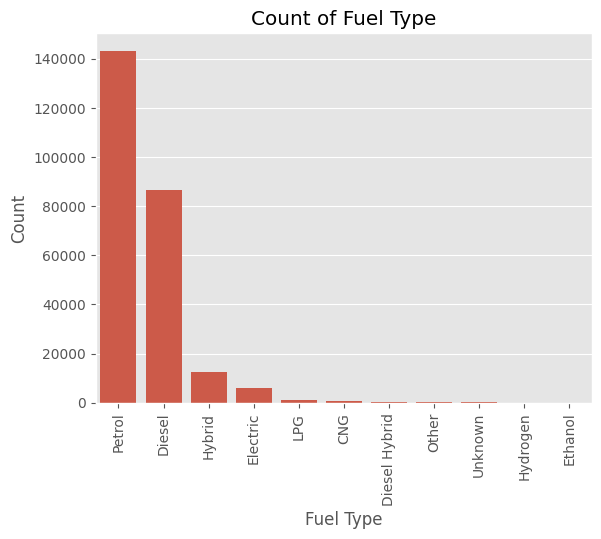

In [208]:
# Sort the fuel_type column by count
fuel_type_order = df['fuel_type'].value_counts().index
ax = sns.countplot(data=df, x='fuel_type', order=fuel_type_order)
ax.set_title('Count of Fuel Type')
ax.set_xlabel('Fuel Type')
ax.set_ylabel('Count')
plt.xticks(rotation=90)
plt.show()

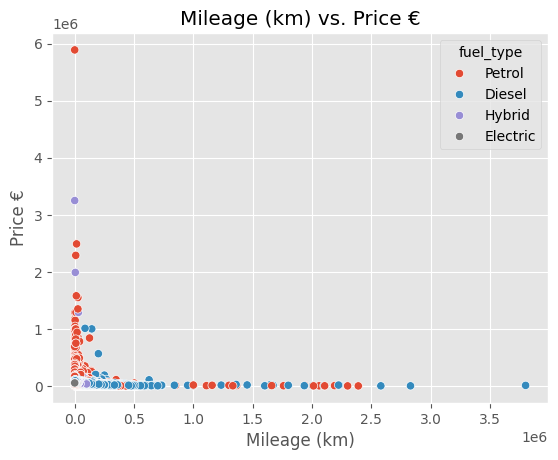

In [209]:
filter = df['fuel_type'].isin(['Petrol', 'Diesel', 'Hybrid', 'Electric'])
ax = sns.scatterplot(data = df[filter], x = 'mileage_in_km', y = 'price_in_euro', hue = 'fuel_type')
ax.set_title('Mileage (km) vs. Price €')
ax.set_xlabel('Mileage (km)')
ax.set_ylabel('Price €')
plt.show()

In [210]:
filter = df['fuel_type'].isin(['Petrol', 'Diesel', 'Hybrid', 'Electric'])
filter_outliers = (df['outlier_model_mileage'] == False) & (df['outlier_model_price'] == False)

ax = sns.scatterplot(data = df[filter & filter_outliers], 
                     x = 'mileage_in_km', 
                     y = 'price_in_euro',
                     hue = 'fuel_type',
                     s=13,
                     alpha = 0.9)
ax.set_title('Mileage (km) vs. Price € (Outliers removed)')
ax.set_xlabel('Mileage (km)')
ax.set_ylabel('Price €')
plt.show()

KeyError: 'outlier_model_mileage'

Exponentieller Verlauf von Preis zu gefahrenen Kilometern

In [ ]:
df[filter & filter_outliers].sort_values(by = 'price_in_euro', ascending= False).head(1)

,brand,model,color,registration_date,year,price_in_euro,power_kw,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,fuel_consumption_g_km,mileage_in_km,offer_description,electric_range_km,fuel_consumption_value,outlier_model_price,outlier_model_mileage
165445,porsche,Porsche 918,white,2014-06-01,2014,1990000,652.0,886.0,Automatic,Hybrid,"3,1 l/100 km",72 g/km,5125.0,Spyder WEISSACH PAKET MAGNESIUM FELGEN,NaN,72.0,False,False


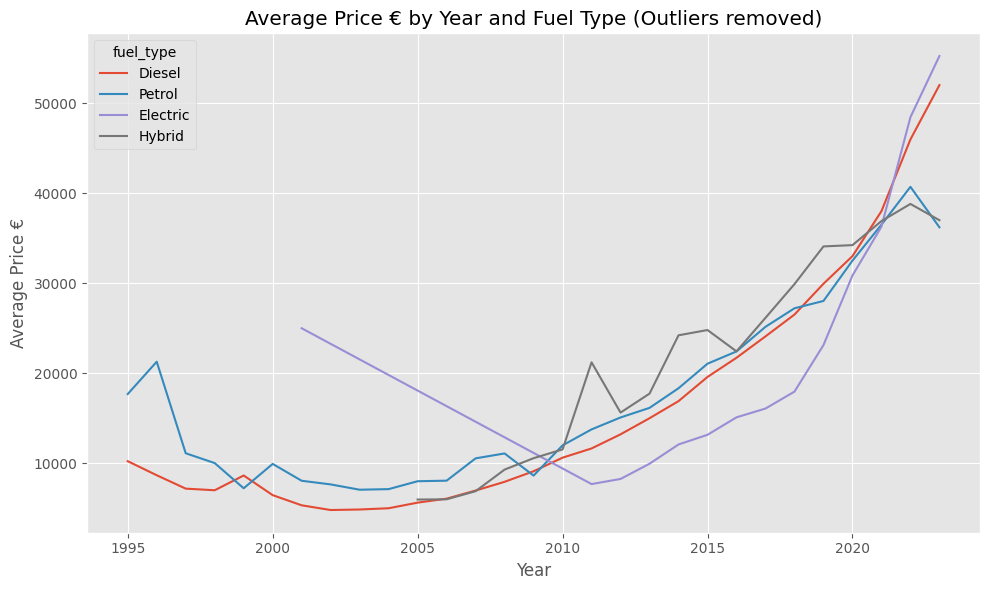

In [ ]:
filter = df['fuel_type'].isin(['Petrol', 'Diesel', 'Hybrid', 'Electric'])
filter_outliers = (df['outlier_model_mileage'] == False) & (df['outlier_model_price'] == False)
filter_price = df['price_in_euro'] < 800000

filtered_df = df[filter & filter_outliers & filter_price]

df_grouped = (
    filtered_df
    .groupby(['year', 'fuel_type'])['price_in_euro']
    .mean()
    .reset_index()
)

plt.figure(figsize=(10, 6))
ax = sns.lineplot(
    data=df_grouped,
    x='year',
    y='price_in_euro',
    hue='fuel_type'
)
ax.set_title('Average Price € by Year and Fuel Type (Outliers removed)')
ax.set_xlabel('Year')
ax.set_ylabel('Average Price €')
plt.tight_layout()
plt.show()

Der Preis ist für neuere Fahrzeuge auch höher. Wobei gerade die Elektrofahrzeuge in den letzten Jahren stark zugenommen haben. 

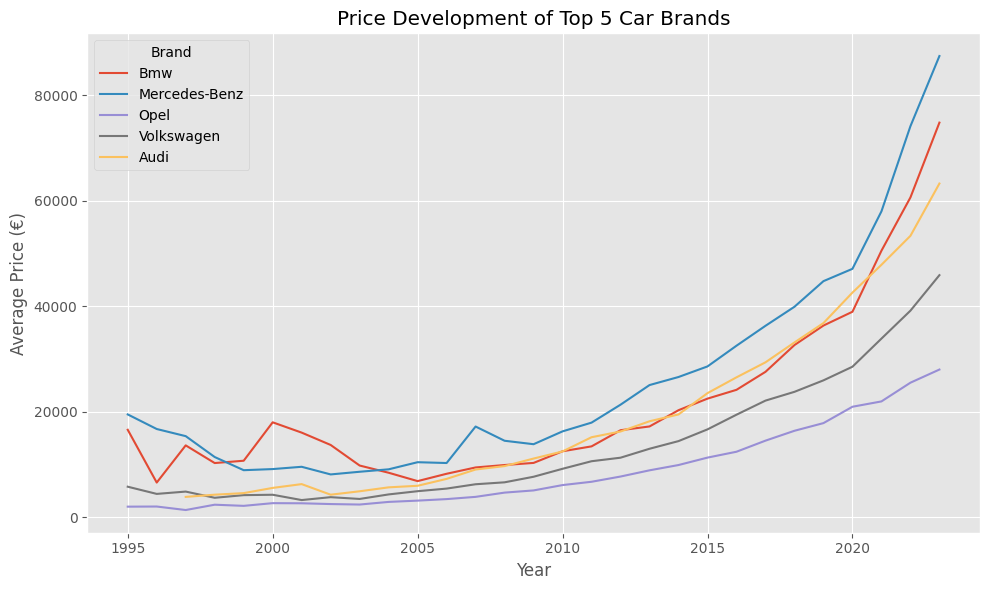

In [ ]:
top5_brands = df['brand'].value_counts().nlargest(5).index

# Filter auf Top 5 Marken
filtered_df = df[df['brand'].isin(top5_brands)]

# Gruppieren: Durchschnittspreis pro Jahr und Marke
grouped = (
    filtered_df
    .groupby(['year', 'brand'])['price_in_euro']
    .mean()
    .reset_index()
)

# 💡 Marken-Namen in Großbuchstaben umwandeln
grouped['brand'] = grouped['brand'].str.title()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped, x='year', y='price_in_euro', hue='brand')
plt.title("Price Development of Top 5 Car Brands")
plt.xlabel("Year")
plt.ylabel("Average Price (€)")
plt.legend(title='Brand')
plt.tight_layout()
plt.show()

/var/folders/y9/d279tz1j1k957cycwlj25_6h0000gn/T/ipykernel_13641/3310060702.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = filtered_df[filter_outliers]


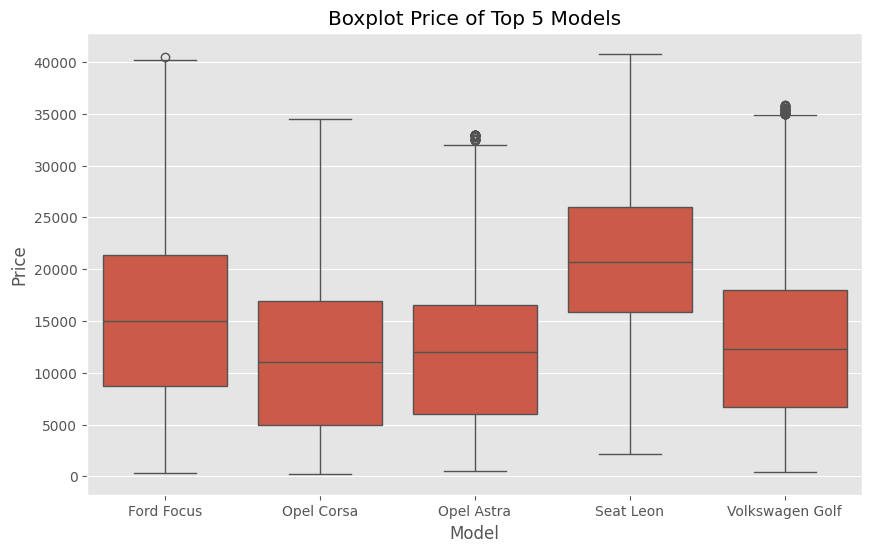

In [ ]:
top5_model = df['model'].value_counts().nlargest(5).index
filtered_df = df[df['model'].isin(top5_model)]
filter_outliers = (df['outlier_model_price'] == False)
filtered_df = filtered_df[filter_outliers]
filtered_df['model'] = filtered_df['model'].str.title()

plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_df, x='model', y='price_in_euro')

plt.title("Boxplot Price of Top 5 Models")
plt.xlabel("Model")
plt.ylabel("Price")
#plt.tight_layout()
plt.show()

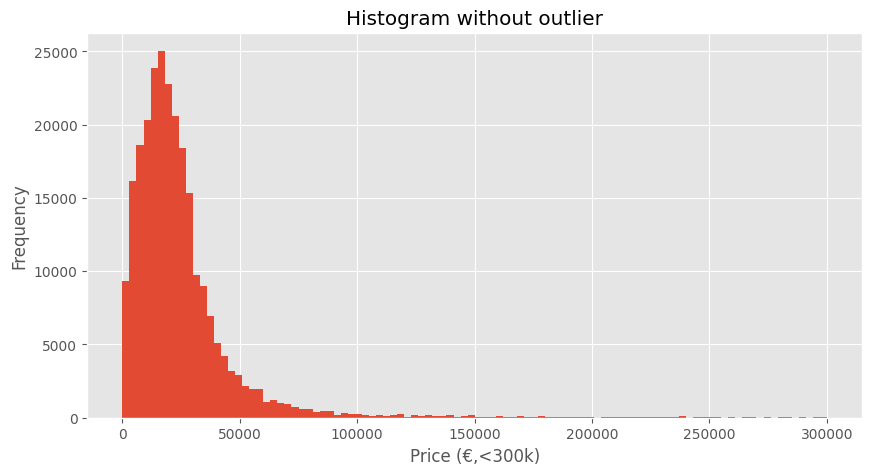

In [ ]:
plt.figure(figsize=(10, 5))
df[df['price_in_euro'] < 300000]['price_in_euro'].plot(kind='hist', bins=100)
plt.xlabel('Price (€,<300k)')
plt.title('Histogram without outlier')
plt.show()

die Zielvariable ist rechtsschief verteilt, das ist typisch für Preise. Der Großteil der Preise liegt im unteren Bereich, während es aber auch einige Ausreißer nach oben gibt. 

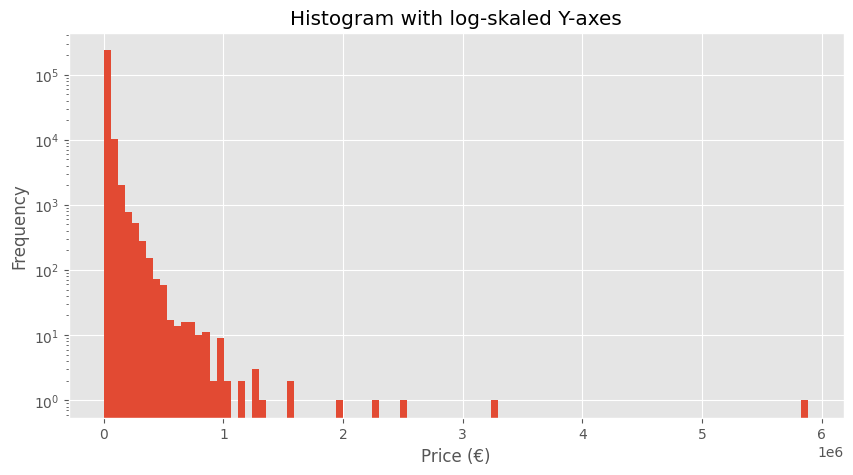

In [ ]:
plt.figure(figsize=(10, 5))
df['price_in_euro'].plot(kind='hist', bins=100, log=True)
plt.xlabel('Price (€)')
plt.title('Histogram with log-skaled Y-axes')
plt.show()

In [ ]:
'''df_segmente = pd.read_csv('df_mit_segment.csv')
join_df = df_segmente[['model', 'segment']].drop_duplicates().reset_index(drop= True).copy()
df = pd.merge(df, join_df, on = 'model').copy()'''

"df_segmente = pd.read_csv('df_mit_segment.csv')\njoin_df = df_segmente[['model', 'segment']].drop_duplicates().reset_index(drop= True).copy()\ndf = pd.merge(df, join_df, on = 'model').copy()"

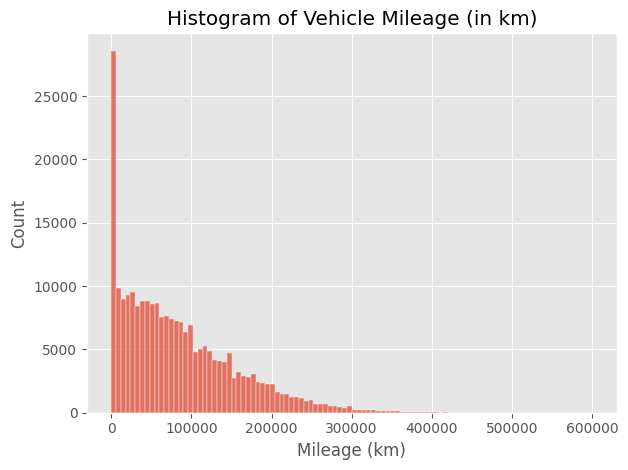

Fahrzeuge mit ≤ 100.000 km: 66.74%


In [ ]:
filter = df['fuel_type'].isin(['Petrol', 'Diesel', 'Hybrid', 'Electric'])
filter_outliers = (df['outlier_model_mileage'] == False) & (df['outlier_model_price'] == False)

sns.histplot(data=df[filter & filter_outliers], x= 'mileage_in_km', bins= 100)
plt.title("Histogram of Vehicle Mileage (in km)")
plt.xlabel("Mileage (km)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Basis-Filter
filter = df['fuel_type'].isin(['Petrol', 'Diesel', 'Hybrid', 'Electric'])
filter_outliers = (df['outlier_model_mileage'] == False) & (df['outlier_model_price'] == False)
basis_filter = filter & filter_outliers


anzahl_unter_100k = df[basis_filter & (df['mileage_in_km'] <= 100000)].shape[0]
gesamt = df[basis_filter].shape[0]
anteil_prozent = (anzahl_unter_100k / gesamt) * 100

print(f"Fahrzeuge mit ≤ 100.000 km: {anteil_prozent:.2f}%")

<Axes: >

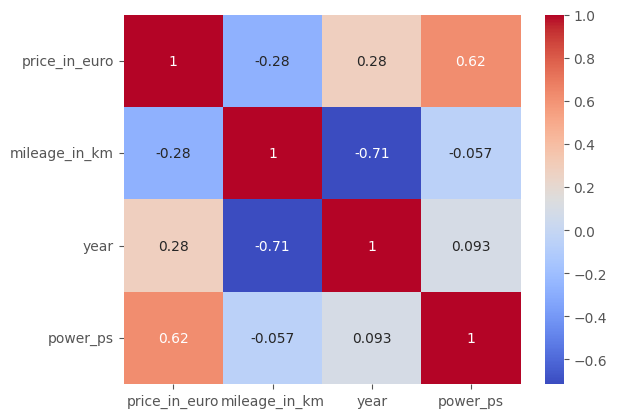

In [ ]:
sns.heatmap(df[['price_in_euro', 'mileage_in_km', 'year', 'power_ps']].corr(), annot=True, cmap='coolwarm')